In [1]:
import pandas as pd

In [2]:
vkospi = pd.read_csv('./VKOSPI.csv')
vkospi = vkospi[::-1]
vkospi

,날짜,종가,시가,고가,저가,거래량,변동 %
268,2022- 10- 04,24.99,26.14,26.14,24.96,NaN,-8.09%
267,2022- 10- 05,24.36,23.82,25.24,23.77,NaN,-2.52%
266,2022- 10- 06,23.37,24.05,24.08,23.11,NaN,-4.06%
265,2022- 10- 07,23.93,24.27,24.27,23.68,NaN,2.40%
264,2022- 10- 11,25.78,26.53,26.89,25.69,NaN,7.73%
...,...,...,...,...,...,...,...
4,2023- 10- 30,20.03,21.04,21.04,19.88,NaN,0.05%
3,2023- 10- 31,19.89,19.25,20.12,19.05,NaN,-0.70%
2,2023- 11- 01,18.79,19.09,19.20,18.74,NaN,-5.53%
1,2023- 11- 02,17.49,17.73,17.88,17.27,NaN,-6.92%


In [3]:
ks200 = pd.read_csv('./KOSPI200.csv')
ks200 = ks200[::-1]
ks200

,날짜,종가,시가,고가,저가,거래량,변동 %
259,2022- 10- 13,282.57,286.27,286.36,282.57,133.29M,-1.57%
258,2022- 10- 14,289.36,287.59,290.32,286.59,132.07M,2.40%
257,2022- 10- 17,289.57,285.89,290.04,284.91,111.60M,0.07%
256,2022- 10- 18,293.59,293.34,293.78,289.77,117.12M,1.39%
255,2022- 10- 19,291.29,293.41,295.34,290.90,110.85M,-0.78%
...,...,...,...,...,...,...,...
4,2023- 10- 25,316.49,319.26,319.59,316.30,91.22M,-0.61%
3,2023- 10- 26,307.75,311.36,312.37,307.75,110.77M,-2.76%
2,2023- 10- 27,308.53,309.68,310.43,307.24,92.93M,0.25%
1,2023- 10- 30,308.95,307.10,310.09,307.01,95.85K,0.14%


In [4]:
straddle = pd.read_csv("./straddle_option_price.csv", index_col=0)
straddle['일자'] = pd.to_datetime(straddle["일자"].astype(str))
straddle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      37 non-null     datetime64[ns]
 1   S-4     37 non-null     float64       
 2   S-3     37 non-null     float64       
 3   S-2     37 non-null     float64       
 4   S-1     37 non-null     float64       
 5   S       37 non-null     float64       
 6   S+1     37 non-null     float64       
 7   S+2     37 non-null     float64       
 8   S+3     37 non-null     float64       
 9   S+4     37 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 3.2 KB


In [5]:
strangle = pd.read_csv("./strangle_option_price.csv", index_col=0)
strangle["일자"] = pd.to_datetime(strangle["일자"].astype(str))
strangle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      37 non-null     datetime64[ns]
 1   S1      37 non-null     float64       
 2   S2      37 non-null     float64       
 3   S3      37 non-null     float64       
 4   S4      36 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.7 KB


In [6]:
vkospi = vkospi[214:252].reset_index(drop=True)
ks200 = ks200[208:246].reset_index(drop=True)

In [7]:
vkospi = vkospi.drop(index=23).reset_index(drop=True)
ks200 = ks200.drop(index=23).reset_index(drop=True)

In [8]:
vkospi["당일 변동율"] = round((vkospi["종가"] - vkospi["시가"]) / vkospi["시가"] * 100, 3)
ks200["당일 변동율"] = round((ks200["종가"] - ks200["시가"]) / ks200["시가"] * 100, 3)

In [9]:
vkospi["날짜"] = pd.to_datetime(vkospi["날짜"])
ks200["날짜"] = pd.to_datetime(ks200["날짜"])

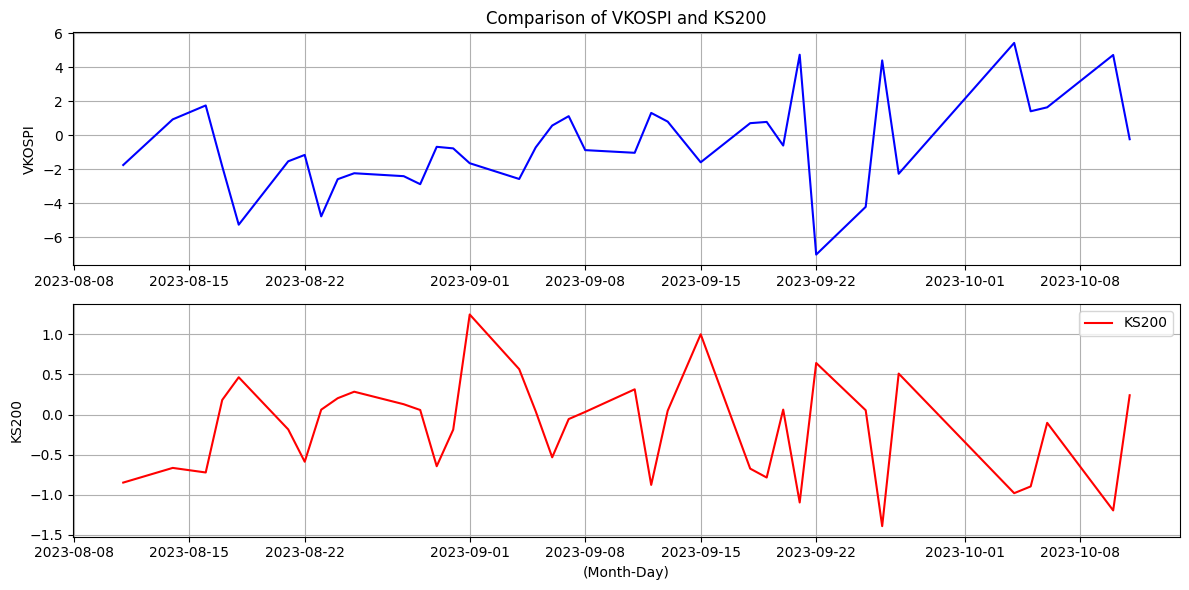

In [10]:
import matplotlib.pyplot as plt

# "날짜" 열에서 연도 제외하고 월과 일만 표시
# vkospi["날짜"] = vkospi["날짜"].str[7:]
# ks200["날짜"] = ks200["날짜"].str[7:]

# 그래프 생성
plt.figure(figsize=(12, 6))

# 첫 번째 서브플롯
plt.subplot(2, 1, 1)  # 2행 1열의 첫 번째 서브플롯
plt.plot(vkospi["날짜"], vkospi["당일 변동율"], label="VKOSPI", color="blue")
plt.ylabel("VKOSPI")
plt.title("Comparison of VKOSPI and KS200")

plt.grid(True)

# 두 번째 서브플롯
plt.subplot(2, 1, 2)  # 2행 1열의 두 번째 서브플롯
plt.plot(ks200["날짜"], ks200["당일 변동율"], label="KS200", color="red")
plt.xlabel("(Month-Day)")
plt.ylabel("KS200")

plt.grid(True)
# 범례 표시
plt.legend(loc="upper right")

# 차트 표시
plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()

In [11]:
straddle['mean'] = (
    straddle["S-4"]
    + straddle["S-3"]
    + straddle["S-2"]
    + straddle["S-1"]
    + straddle["S"]
    + straddle["S+1"]
    + straddle["S+2"]
		+ straddle['S+3']
		+ straddle['S+4']
)/9

In [12]:
strangle = strangle.fillna(0)
strangle["mean"] = (strangle["S1"] + strangle["S2"] + strangle["S3"] + strangle["S4"]) / 4
strangle

,일자,S1,S2,S3,S4,mean
0,2023-08-11,-0.87,-0.84,-0.74,-0.61,-0.7650
1,2023-08-14,-0.13,-0.11,-0.07,-0.05,-0.0900
2,2023-08-16,0.25,0.22,0.22,0.22,0.2275
3,2023-08-17,-0.53,-0.48,-0.47,-0.43,-0.4775
4,2023-08-18,-0.47,-0.48,-0.44,-0.40,-0.4475
5,2023-08-21,-0.29,-0.30,-0.27,-0.24,-0.2750
6,2023-08-22,-0.56,-0.56,-0.49,-0.41,-0.5050
7,2023-08-23,-0.26,-0.23,-0.21,-0.19,-0.2225
8,2023-08-24,-0.28,-0.27,-0.24,-0.22,-0.2525
9,2023-08-25,-0.07,-0.08,-0.05,-0.06,-0.0650


/var/folders/y7/kjtd2q_j0c13ld5lwg5kd25r0000gn/T/ipykernel_69715/2998188758.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)  # 2행 1열의 첫 번째 서브플롯


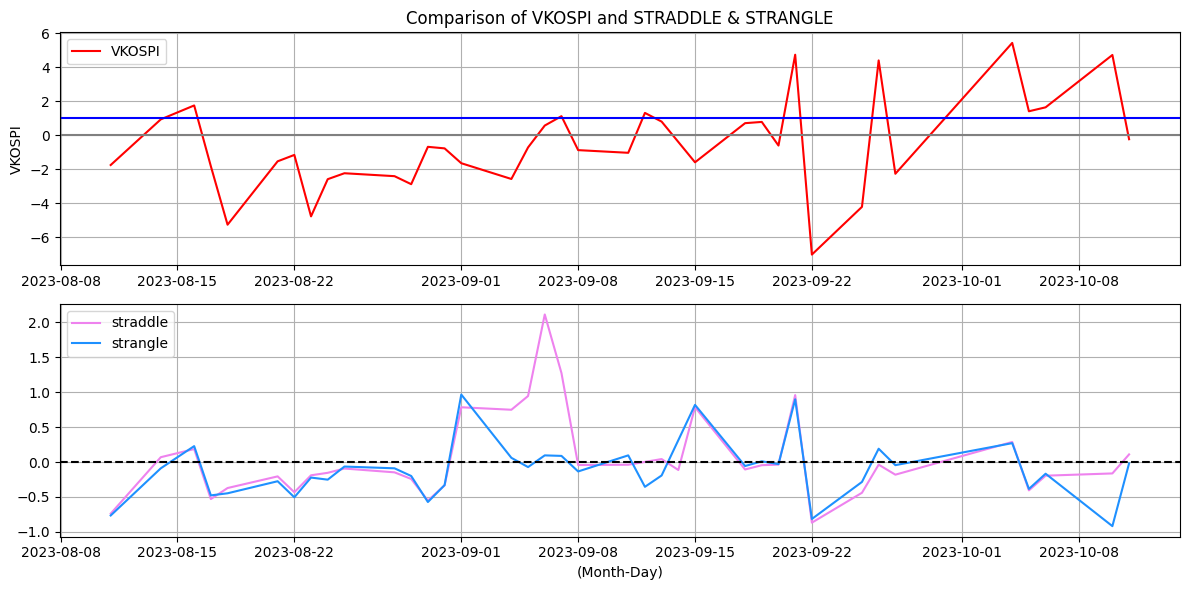

In [14]:
import matplotlib.pyplot as plt

# "날짜" 열에서 연도 제외하고 월과 일만 표시
# vkospi["날짜"] = vkospi["날짜"].str[7:]
# ks200["날짜"] = ks200["날짜"].str[7:]

# 그래프 생성
plt.figure(figsize=(12, 6))
plt.axhline(0, color="red", linestyle="--")
# 첫 번째 서브플롯
plt.subplot(2, 1, 1)  # 2행 1열의 첫 번째 서브플롯
plt.plot(vkospi["날짜"], vkospi["당일 변동율"], label="VKOSPI", color="red")
plt.axhline(1, color="blue", linestyle="solid")
plt.axhline(0, color="grey", linestyle="solid")
plt.ylabel("VKOSPI")
plt.title("Comparison of VKOSPI and STRADDLE & STRANGLE")

plt.grid(True)
plt.legend(loc="upper left")

# 두 번째 서브플롯
plt.subplot(2, 1, 2)  # 2행 1열의 두 번째 서브플롯
plt.plot(straddle["일자"], straddle["mean"], label="straddle", color="violet")
plt.plot(strangle["일자"], strangle["mean"], label="strangle", color="dodgerblue")

plt.axhline(0, color="black", linestyle="--")
plt.xlabel("(Month-Day)")

plt.grid(True)
# 범례 표시
plt.legend(loc="upper left")

# 차트 표시
plt.tight_layout()  # 서브플롯 간 간격 조절
plt.savefig('vkospi_labeling_chart.png')
plt.show()